In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from collections import Counter
import pickle

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [3]:
dataset_path1 = "C:\\Users\\hp-pc\\Desktop\\GRP\\sim_data\\moth\\moth_total\\moth_total.csv"

In [4]:
df_moth = pd.read_csv(dataset_path1, index_col=False)

In [5]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [6]:
df_moth = df_moth.dropna()

In [7]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [8]:
num_trial = len(df_moth[df_moth['termination'] == 1])

In [9]:
num_trial

5989

In [10]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [11]:
num_trial

5989

In [12]:
num_D_trial = len(df_moth[df_moth['declare'] == 1])

In [13]:
num_D_trial

5766

In [14]:
num_TO_trial = len(df_moth[df_moth['time_out'] == 1])

In [15]:
num_TO_trial

223

In [16]:
trial_start = []

In [17]:
trial_D_start = []

In [18]:
for i in range(df_moth.shape[0]):
    if df_moth['time'].iloc[i] == 0:
        trial_start.append(i)
    if df_moth['termination'].iloc[i] == 1:
        trial_D_start.append(i)

In [19]:
df_moth.shape

(362169, 14)

In [20]:
range(df_moth.shape[0])

range(0, 362169)

In [21]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,declare,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0,0


In [22]:
trial_start

[0,
 47,
 94,
 208,
 258,
 320,
 382,
 452,
 588,
 598,
 608,
 622,
 636,
 657,
 678,
 699,
 720,
 751,
 782,
 821,
 860,
 877,
 894,
 911,
 936,
 961,
 986,
 1038,
 1090,
 1116,
 1144,
 1172,
 1200,
 1249,
 1290,
 1331,
 1362,
 1393,
 1501,
 1564,
 1627,
 1803,
 1875,
 1947,
 2005,
 2064,
 2123,
 2206,
 2327,
 2390,
 2401,
 2402,
 2403,
 2404,
 2405,
 2406,
 2807,
 2847,
 2895,
 2994,
 3036,
 3086,
 3136,
 3194,
 3252,
 3253,
 3306,
 3359,
 3409,
 3460,
 3511,
 3567,
 3639,
 3711,
 3769,
 3819,
 3869,
 3933,
 3996,
 4059,
 4126,
 4173,
 4174,
 4485,
 4518,
 4519,
 4520,
 4643,
 4662,
 4932,
 4974,
 5042,
 5105,
 5168,
 5215,
 5308,
 5401,
 5461,
 5862,
 6263,
 6322,
 6359,
 6760,
 6782,
 6798,
 6810,
 6822,
 6834,
 6873,
 6912,
 6954,
 7012,
 7070,
 7108,
 7146,
 7218,
 7277,
 7336,
 7413,
 7421,
 7482,
 7552,
 7657,
 7780,
 7858,
 7962,
 8057,
 8173,
 8188,
 8589,
 8627,
 8665,
 8704,
 8743,
 8786,
 8823,
 8860,
 8898,
 8936,
 8974,
 9021,
 9068,
 9100,
 9132,
 9176,
 9220,
 9347,
 9

In [23]:
trial_D_start

[46,
 93,
 207,
 257,
 319,
 381,
 451,
 597,
 607,
 621,
 635,
 656,
 677,
 698,
 719,
 750,
 781,
 820,
 859,
 876,
 893,
 910,
 935,
 960,
 985,
 1037,
 1089,
 1115,
 1143,
 1171,
 1199,
 1248,
 1289,
 1330,
 1361,
 1392,
 1500,
 1563,
 1626,
 1802,
 1874,
 1946,
 2004,
 2063,
 2122,
 2205,
 2326,
 2389,
 2400,
 2401,
 2402,
 2403,
 2404,
 2405,
 2806,
 2846,
 2894,
 2993,
 3035,
 3085,
 3135,
 3193,
 3251,
 3252,
 3305,
 3358,
 3408,
 3459,
 3510,
 3566,
 3638,
 3710,
 3768,
 3818,
 3868,
 3932,
 3995,
 4058,
 4125,
 4172,
 4173,
 4484,
 4517,
 4518,
 4519,
 4642,
 4661,
 4931,
 4973,
 5041,
 5104,
 5167,
 5214,
 5307,
 5400,
 5460,
 5861,
 6262,
 6321,
 6358,
 6759,
 6781,
 6797,
 6809,
 6821,
 6833,
 6872,
 6911,
 6953,
 7011,
 7069,
 7107,
 7145,
 7217,
 7276,
 7335,
 7412,
 7420,
 7481,
 7551,
 7656,
 7779,
 7857,
 7961,
 8056,
 8172,
 8187,
 8588,
 8626,
 8664,
 8703,
 8742,
 8785,
 8822,
 8859,
 8897,
 8935,
 8973,
 9020,
 9067,
 9099,
 9131,
 9175,
 9219,
 9346,
 9398,
 9450

In [24]:
trial_D_start[-1]

362168

In [25]:

df_moth.pop('declare')


0         0
1         0
2         0
3         0
4         0
         ..
362164    0
362165    0
362166    0
362167    0
362168    1
Name: declare, Length: 362169, dtype: int64

In [26]:
df_moth

,time,windvx,windvy,con,detection,posx,posy,yaw,v,yaw_c,behavior,time_out,termination
0,0,1.06243,-0.000094,0.095689,1,82.9380,-2.69365,-111.559,1.000280,-180.0050,1,0,0
1,1,1.06628,-0.000175,0.122268,1,82.4698,-3.57635,-134.588,0.999740,-180.0090,1,0,0
2,2,1.06973,-0.000267,0.123117,1,81.7358,-4.27575,-154.369,0.999860,-180.0140,1,0,0
3,3,1.07339,-0.000367,0.106525,1,80.8518,-4.75450,-162.096,0.999944,-180.0200,1,0,0
4,4,1.07784,-0.000486,0.118507,1,79.9105,-5.09579,-165.942,0.999946,-260.0260,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362164,36,1.91449,0.064206,3.319730,1,31.9183,-13.72340,161.831,1.000250,261.9170,1,0,0
362165,37,1.91312,0.069797,2.583560,1,30.9352,-13.51610,-173.445,1.000580,-97.9122,2,0,0
362166,38,1.91149,0.074357,0.030929,1,29.9309,-13.62450,-156.950,1.000570,-177.7730,1,0,0
362167,39,1.90994,0.077429,0.464106,1,28.9915,-13.98410,-148.021,1.000380,-97.6792,2,0,0


In [27]:
df_moth.pop('termination')
df_moth.pop('time_out')
df_moth.pop('time')
df_moth.pop('posx')
df_moth.pop('posy')
df_moth.pop('yaw')
df_moth.pop('v')

0         1.000280
1         0.999740
2         0.999860
3         0.999944
4         0.999946
            ...   
362164    1.000250
362165    1.000580
362166    1.000570
362167    1.000380
362168    0.999488
Name: v, Length: 362169, dtype: float64

In [28]:
df_moth.pop('behavior')

0         1
1         1
2         1
3         1
4         2
         ..
362164    1
362165    2
362166    1
362167    2
362168    2
Name: behavior, Length: 362169, dtype: int64

In [29]:
df_moth

,windvx,windvy,con,detection,yaw_c
0,1.06243,-0.000094,0.095689,1,-180.0050
1,1.06628,-0.000175,0.122268,1,-180.0090
2,1.06973,-0.000267,0.123117,1,-180.0140
3,1.07339,-0.000367,0.106525,1,-180.0200
4,1.07784,-0.000486,0.118507,1,-260.0260
...,...,...,...,...,...
362164,1.91449,0.064206,3.319730,1,261.9170
362165,1.91312,0.069797,2.583560,1,-97.9122
362166,1.91149,0.074357,0.030929,1,-177.7730
362167,1.90994,0.077429,0.464106,1,-97.6792


In [30]:
# convert negative yaw command to positive

def change_yaw(x):
    if x < 0:
        x += 360
    return x

In [31]:
df_moth

,windvx,windvy,con,detection,yaw_c
0,1.06243,-0.000094,0.095689,1,-180.0050
1,1.06628,-0.000175,0.122268,1,-180.0090
2,1.06973,-0.000267,0.123117,1,-180.0140
3,1.07339,-0.000367,0.106525,1,-180.0200
4,1.07784,-0.000486,0.118507,1,-260.0260
...,...,...,...,...,...
362164,1.91449,0.064206,3.319730,1,261.9170
362165,1.91312,0.069797,2.583560,1,-97.9122
362166,1.91149,0.074357,0.030929,1,-177.7730
362167,1.90994,0.077429,0.464106,1,-97.6792


In [32]:
df_moth['yaw_c'] = df_moth['yaw_c'].apply(change_yaw)

In [33]:
df_moth

,windvx,windvy,con,detection,yaw_c
0,1.06243,-0.000094,0.095689,1,179.9950
1,1.06628,-0.000175,0.122268,1,179.9910
2,1.06973,-0.000267,0.123117,1,179.9860
3,1.07339,-0.000367,0.106525,1,179.9800
4,1.07784,-0.000486,0.118507,1,99.9740
...,...,...,...,...,...
362164,1.91449,0.064206,3.319730,1,261.9170
362165,1.91312,0.069797,2.583560,1,262.0878
362166,1.91149,0.074357,0.030929,1,182.2270
362167,1.90994,0.077429,0.464106,1,262.3208


In [34]:
yaw_c1 = df_moth.pop("yaw_c")

In [35]:
df_moth

,windvx,windvy,con,detection
0,1.06243,-0.000094,0.095689,1
1,1.06628,-0.000175,0.122268,1
2,1.06973,-0.000267,0.123117,1
3,1.07339,-0.000367,0.106525,1
4,1.07784,-0.000486,0.118507,1
...,...,...,...,...
362164,1.91449,0.064206,3.319730,1
362165,1.91312,0.069797,2.583560,1
362166,1.91149,0.074357,0.030929,1
362167,1.90994,0.077429,0.464106,1


In [36]:
yaw_c2 = yaw_c1 * np.pi / 180

In [37]:
yaw_c2

0         3.141505
1         3.141436
2         3.141348
3         3.141244
4         1.744875
            ...   
362164    4.571314
362165    4.574295
362166    3.180461
362167    4.578362
362168    1.786676
Name: yaw_c, Length: 362169, dtype: float64

In [38]:
df_moth['Cx'] = np.cos(yaw_c2)
df_moth['Cy'] = np.sin(yaw_c2)

In [39]:
df_moth

,windvx,windvy,con,detection,Cx,Cy
0,1.06243,-0.000094,0.095689,1,-1.000000,0.000087
1,1.06628,-0.000175,0.122268,1,-1.000000,0.000157
2,1.06973,-0.000267,0.123117,1,-1.000000,0.000244
3,1.07339,-0.000367,0.106525,1,-1.000000,0.000349
4,1.07784,-0.000486,0.118507,1,-0.173201,0.984886
...,...,...,...,...,...,...
362164,1.91449,0.064206,3.319730,1,-0.140607,-0.990065
362165,1.91312,0.069797,2.583560,1,-0.137655,-0.990480
362166,1.91149,0.074357,0.030929,1,-0.999245,-0.038859
362167,1.90994,0.077429,0.464106,1,-0.133626,-0.991032


In [40]:
num_features = df_moth.shape[1]

In [41]:
num_features

6

In [42]:
num_features = df_moth.shape[0]

In [43]:
num_features

362169

In [44]:
df_moth.shape

(362169, 6)

In [45]:
mean = df_moth.mean()
std = df_moth.std()
df_moth = (df_moth - mean) / std

In [46]:
mean

windvx       1.141364
windvy       0.005833
con          0.189796
detection    0.522480
Cx          -0.281276
Cy          -0.034508
dtype: float64

In [47]:
std

windvx       0.499497
windvy       0.116919
con          0.550094
detection    0.499495
Cx           0.658125
Cy           0.697544
dtype: float64

In [48]:
df_moth

,windvx,windvy,con,detection,Cx,Cy
0,-0.158027,-0.050691,-0.171074,0.956006,-1.092078,0.049595
1,-0.150319,-0.051391,-0.122757,0.956006,-1.092078,0.049695
2,-0.143412,-0.052177,-0.121213,0.956006,-1.092078,0.049820
3,-0.136085,-0.053031,-0.151375,0.956006,-1.092078,0.049971
4,-0.127176,-0.054051,-0.129594,0.956006,0.164216,1.461405
...,...,...,...,...,...,...
362164,1.547810,0.499258,5.689821,0.956006,0.213742,-1.369889
362165,1.545068,0.547082,4.351558,0.956006,0.218227,-1.370484
362166,1.541804,0.586083,-0.288799,0.956006,-1.090931,-0.006238
362167,1.538701,0.612357,0.498661,0.956006,0.224349,-1.371275


In [49]:
train_df = df_moth[0:int(len(df_moth) * 0.8)]

In [50]:
train_df

,windvx,windvy,con,detection,Cx,Cy
0,-0.158027,-0.050691,-0.171074,0.956006,-1.092078,0.049595
1,-0.150319,-0.051391,-0.122757,0.956006,-1.092078,0.049695
2,-0.143412,-0.052177,-0.121213,0.956006,-1.092078,0.049820
3,-0.136085,-0.053031,-0.151375,0.956006,-1.092078,0.049971
4,-0.127176,-0.054051,-0.129594,0.956006,0.164216,1.461405
...,...,...,...,...,...,...
289730,0.239693,0.383297,-0.345024,-1.046016,0.219924,-1.370706
289731,0.241876,0.406019,-0.345024,-1.046016,-0.429877,-1.134177
289732,0.244939,0.433343,-0.229525,0.956006,-0.909876,-0.631219
289733,0.248823,0.473891,0.953175,0.956006,-1.091210,0.001014


In [51]:
int(len(df_moth) * 0.9)
    

325952

In [52]:
train_df = df_moth[0:int(len(df_moth) * 0.8)]
val_df = df_moth[int(len(df_moth) * 0.8):int(len(df_moth) * 0.9)]
test_df = df_moth[int(len(df_moth) * 0.9):]

In [53]:
train_df

,windvx,windvy,con,detection,Cx,Cy
0,-0.158027,-0.050691,-0.171074,0.956006,-1.092078,0.049595
1,-0.150319,-0.051391,-0.122757,0.956006,-1.092078,0.049695
2,-0.143412,-0.052177,-0.121213,0.956006,-1.092078,0.049820
3,-0.136085,-0.053031,-0.151375,0.956006,-1.092078,0.049971
4,-0.127176,-0.054051,-0.129594,0.956006,0.164216,1.461405
...,...,...,...,...,...,...
289730,0.239693,0.383297,-0.345024,-1.046016,0.219924,-1.370706
289731,0.241876,0.406019,-0.345024,-1.046016,-0.429877,-1.134177
289732,0.244939,0.433343,-0.229525,0.956006,-0.909876,-0.631219
289733,0.248823,0.473891,0.953175,0.956006,-1.091210,0.001014


In [54]:
# define the window_generator function
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df, val_df, test_df,
                 label_columns=None,
                 input_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        self.input_columns = input_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Input column names: {self.input_columns}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        if self.input_columns is not None:
            inputs = tf.stack(
                [inputs[:, :, self.column_indices[name]] for name in self.input_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=16, )

        ds = ds.map(self.split_window)

        return ds
    
    # convert DataFrame into Dataset
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    # fetch an example batch for plotting
    def example(self):
        # by default, call example function returns None
        result = getattr(self, '_example', None)
        if result is None:
            # no example batch was found, so get one from the '.train' dataset
            # iter: creates an iterator object
            result = next(iter(self.train))
            # and cache it for the next time
            self._example = result

        return result

    def plot(self, model=None, plot_col='Yaw_e', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        # find the index of the column that the user wants to plot
        plot_col_index = self.column_indices[plot_col]
        # only plots maximal 3 batches of data
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n + 1)
            plt.ylabel(f'{plot_col}[normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                # get: method returns the value of the item (index) with the specified key (name)
                # get(keyname, value=None)
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                # with the continue statement, we can stop the current iteration of the for loop
                # and continue with the next
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k',
                        label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)
            if n == 0:
                plt.legend()

        plt.xlabel('Time[s]')
        plt.show()


In [55]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


In [56]:
model_selection = 1

columns = df_moth.columns
label_columns = ['Cx', 'Cy']
input_columns = list((Counter(columns) - Counter(label_columns)).elements())
num_inputs = len(input_columns)

In [57]:
Counter(columns)

Counter({'windvx': 1, 'windvy': 1, 'con': 1, 'detection': 1, 'Cx': 1, 'Cy': 1})

In [58]:
Counter(label_columns)

Counter({'Cx': 1, 'Cy': 1})

In [59]:
Counter(columns) - Counter(label_columns)

Counter({'windvx': 1, 'windvy': 1, 'con': 1, 'detection': 1})

In [60]:
columns

Index(['windvx', 'windvy', 'con', 'detection', 'Cx', 'Cy'], dtype='object')

In [61]:
label_columns

['Cx', 'Cy']

In [62]:
input_columns

['windvx', 'windvy', 'con', 'detection']

In [63]:
num_inputs

4

In [64]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=kernel_size1,
                           activation='relu',
                           input_shape=(CONV_WIDTH, num_inputs)),
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=kernel_size2,
                           activation='relu'),
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=kernel_size3,
                           activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=2),
])

In [65]:
kernel_size1

3

In [66]:
kernel_size2

3

In [67]:
kernel_size3

2

In [68]:
kernel_size4

1

In [69]:
if model_selection == 1:
    conv_window = WindowGenerator(
        input_width=CONV_WIDTH,
        label_width=1,
        shift=0,
        train_df=train_df,
        test_df=test_df,
        val_df=val_df,
        label_columns=label_columns,
        input_columns=input_columns
    )

In [70]:
conv_window

Total window size: 6
Input indices: [0 1 2 3 4 5]
Input column names: ['windvx', 'windvy', 'con', 'detection']
Label indices: [5]
Label column name(s): ['Cx', 'Cy']

In [71]:
history = compile_and_fit(conv_model, conv_window)



Epoch 1/20
18109/18109 [==============================] - 45s 2ms/step - loss: 0.7123 - mean_absolute_error: 0.6717 - val_loss: 0.6779 - val_mean_absolute_error: 0.6545
Epoch 2/20
18109/18109 [==============================] - 45s 2ms/step - loss: 0.6827 - mean_absolute_error: 0.6482 - val_loss: 0.6677 - val_mean_absolute_error: 0.6476
Epoch 3/20
18109/18109 [==============================] - 48s 3ms/step - loss: 0.6659 - mean_absolute_error: 0.6368 - val_loss: 0.6538 - val_mean_absolute_error: 0.6367
Epoch 4/20
18109/18109 [==============================] - 45s 3ms/step - loss: 0.6557 - mean_absolute_error: 0.6293 - val_loss: 0.6500 - val_mean_absolute_error: 0.6326
Epoch 5/20
18109/18109 [==============================] - 45s 2ms/step - loss: 0.6488 - mean_absolute_error: 0.6247 - val_loss: 0.6521 - val_mean_absolute_error: 0.6366
Epoch 6/20
18109/18109 [==============================] - 47s 3ms/step - loss: 0.6446 - mean_absolute_error: 0.6216 - val_loss: 0.6479 - val_mean_absolute_

In [72]:
    val_performance = {}

In [73]:
    performance = {}

In [74]:


    val_performance['Conv'] = conv_model.evaluate(conv_window.val)

2264/2264 [==============================] - 5s 2ms/step - loss: 0.6382 - mean_absolute_error: 0.6181


TransferLearning

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [76]:
dataset_path2 = "C:\\Users\\hp-pc\\Desktop\\GRP\\real_data\\moth\\moth_total\\moth_total.csv"

In [77]:
df_moth_real = pd.read_csv(dataset_path2, index_col=False)

In [78]:
df_moth_real

,time,posx,posy,con,detection,windv,winddir,yaw_c,yaw,yaw_error
0,1,-1.133428,-0.087199,0.0,0,0.00,180.000000,20.000000,84.979655,-64.979655
1,2,-1.133499,-0.087052,543.0,1,0.41,-124.018084,20.000000,84.981916,-64.981916
2,3,-1.133539,-0.087095,581.0,1,0.45,-120.025794,59.974206,84.974206,-25.000000
3,4,-1.130452,-0.079646,529.0,1,0.81,-108.487564,71.512436,80.512436,-9.000000
4,5,-1.108861,-0.040860,576.0,1,0.73,-114.110007,65.889992,69.889992,-4.000000
...,...,...,...,...,...,...,...,...,...,...
13694,68,-0.680270,-0.725390,642.0,0,1.63,126.753343,-67.665235,-74.246657,-6.581422
13695,69,-0.667918,-0.760249,652.0,0,2.38,117.149818,-67.665235,-73.850182,-6.184947
13696,70,-0.653904,-0.798121,635.0,0,1.49,113.611592,-67.665235,-73.388408,-5.723173
13697,71,-0.642391,-0.828852,627.0,0,1.50,99.991336,-67.665235,-73.008664,-5.343430


Preprocessing & Cleansing

In [79]:
df_moth_real = df_moth_real.dropna()

In [80]:
df_moth_real

,time,posx,posy,con,detection,windv,winddir,yaw_c,yaw,yaw_error
0,1,-1.133428,-0.087199,0.0,0,0.00,180.000000,20.000000,84.979655,-64.979655
1,2,-1.133499,-0.087052,543.0,1,0.41,-124.018084,20.000000,84.981916,-64.981916
2,3,-1.133539,-0.087095,581.0,1,0.45,-120.025794,59.974206,84.974206,-25.000000
3,4,-1.130452,-0.079646,529.0,1,0.81,-108.487564,71.512436,80.512436,-9.000000
4,5,-1.108861,-0.040860,576.0,1,0.73,-114.110007,65.889992,69.889992,-4.000000
...,...,...,...,...,...,...,...,...,...,...
13694,68,-0.680270,-0.725390,642.0,0,1.63,126.753343,-67.665235,-74.246657,-6.581422
13695,69,-0.667918,-0.760249,652.0,0,2.38,117.149818,-67.665235,-73.850182,-6.184947
13696,70,-0.653904,-0.798121,635.0,0,1.49,113.611592,-67.665235,-73.388408,-5.723173
13697,71,-0.642391,-0.828852,627.0,0,1.50,99.991336,-67.665235,-73.008664,-5.343430


In [81]:
df_moth_real.pop('time')
df_moth_real.pop('posx')
df_moth_real.pop('posy')
df_moth_real.pop('yaw')
df_moth_real.pop('yaw_error')

0       -64.979655
1       -64.981916
2       -25.000000
3        -9.000000
4        -4.000000
           ...    
13694    -6.581422
13695    -6.184947
13696    -5.723173
13697    -5.343430
13698    -5.063220
Name: yaw_error, Length: 13699, dtype: float64

In [82]:
df_moth_real

,con,detection,windv,winddir,yaw_c
0,0.0,0,0.00,180.000000,20.000000
1,543.0,1,0.41,-124.018084,20.000000
2,581.0,1,0.45,-120.025794,59.974206
3,529.0,1,0.81,-108.487564,71.512436
4,576.0,1,0.73,-114.110007,65.889992
...,...,...,...,...,...
13694,642.0,0,1.63,126.753343,-67.665235
13695,652.0,0,2.38,117.149818,-67.665235
13696,635.0,0,1.49,113.611592,-67.665235
13697,627.0,0,1.50,99.991336,-67.665235


In [83]:
def change_yaw(x):
    if x < 0:
        x += 360
    return x

In [84]:
df_moth_real['yaw_c'] = df_moth_real['yaw_c'].apply(change_yaw)

In [85]:
df_moth_real

,con,detection,windv,winddir,yaw_c
0,0.0,0,0.00,180.000000,20.000000
1,543.0,1,0.41,-124.018084,20.000000
2,581.0,1,0.45,-120.025794,59.974206
3,529.0,1,0.81,-108.487564,71.512436
4,576.0,1,0.73,-114.110007,65.889992
...,...,...,...,...,...
13694,642.0,0,1.63,126.753343,292.334765
13695,652.0,0,2.38,117.149818,292.334765
13696,635.0,0,1.49,113.611592,292.334765
13697,627.0,0,1.50,99.991336,292.334765


In [86]:
yaw_c_real = df_moth_real.pop("yaw_c")

In [87]:
df_moth_real

,con,detection,windv,winddir
0,0.0,0,0.00,180.000000
1,543.0,1,0.41,-124.018084
2,581.0,1,0.45,-120.025794
3,529.0,1,0.81,-108.487564
4,576.0,1,0.73,-114.110007
...,...,...,...,...
13694,642.0,0,1.63,126.753343
13695,652.0,0,2.38,117.149818
13696,635.0,0,1.49,113.611592
13697,627.0,0,1.50,99.991336


In [88]:
yaw_c_real = yaw_c_real * np.pi / 180 # deg to rad

In [89]:
df_moth_real['Cx'] = np.cos(yaw_c_real)
df_moth_real['Cy'] = np.sin(yaw_c_real)

In [90]:
df_moth_real

,con,detection,windv,winddir,Cx,Cy
0,0.0,0,0.00,180.000000,0.939693,0.342020
1,543.0,1,0.41,-124.018084,0.939693,0.342020
2,581.0,1,0.45,-120.025794,0.500390,0.865800
3,529.0,1,0.81,-108.487564,0.317099,0.948393
4,576.0,1,0.73,-114.110007,0.408490,0.912763
...,...,...,...,...,...,...
13694,642.0,0,1.63,126.753343,0.380017,-0.924979
13695,652.0,0,2.38,117.149818,0.380017,-0.924979
13696,635.0,0,1.49,113.611592,0.380017,-0.924979
13697,627.0,0,1.50,99.991336,0.380017,-0.924979


In [91]:
def change_winddir(x):
    if x < 0:
        x += 360
    return x

In [92]:
df_moth_real['winddir'] = df_moth_real['winddir'].apply(change_winddir)

In [93]:
winddir = df_moth_real.pop("winddir")

In [94]:
winddir = winddir * np.pi / 180

In [95]:
df_moth_real['windvx'] = df_moth_real['windv']*np.cos(winddir)
df_moth_real['windvy'] = df_moth_real['windv']*np.sin(winddir)


In [96]:
df_moth_real

,con,detection,windv,Cx,Cy,windvx,windvy
0,0.0,0,0.00,0.939693,0.342020,-0.000000,0.000000
1,543.0,1,0.41,0.939693,0.342020,-0.229376,-0.339833
2,581.0,1,0.45,0.500390,0.865800,-0.225175,-0.389610
3,529.0,1,0.81,0.317099,0.948393,-0.256850,-0.768198
4,576.0,1,0.73,0.408490,0.912763,-0.298198,-0.666317
...,...,...,...,...,...,...,...
13694,642.0,0,1.63,0.380017,-0.924979,-0.975345,1.305987
13695,652.0,0,2.38,0.380017,-0.924979,-1.086039,2.117763
13696,635.0,0,1.49,0.380017,-0.924979,-0.596796,1.365260
13697,627.0,0,1.50,0.380017,-0.924979,-0.260249,1.477251


In [97]:
winddir = df_moth_real.pop("windv")

In [98]:
df_moth_real = df_moth_real[['windvx', 'windvy', 'con', 'detection', 'Cx', 'Cy']]

In [99]:
df_moth_real

,windvx,windvy,con,detection,Cx,Cy
0,-0.000000,0.000000,0.0,0,0.939693,0.342020
1,-0.229376,-0.339833,543.0,1,0.939693,0.342020
2,-0.225175,-0.389610,581.0,1,0.500390,0.865800
3,-0.256850,-0.768198,529.0,1,0.317099,0.948393
4,-0.298198,-0.666317,576.0,1,0.408490,0.912763
...,...,...,...,...,...,...
13694,-0.975345,1.305987,642.0,0,0.380017,-0.924979
13695,-1.086039,2.117763,652.0,0,0.380017,-0.924979
13696,-0.596796,1.365260,635.0,0,0.380017,-0.924979
13697,-0.260249,1.477251,627.0,0,0.380017,-0.924979


In [100]:
mean = df_moth_real.mean()
std = df_moth_real.std()
df_moth_real = (df_moth_real - mean) / std

In [101]:
df_moth_real

,windvx,windvy,con,detection,Cx,Cy
0,0.454494,0.094735,-7.541754,-1.209303,2.035921,0.254433
1,-0.325366,-0.142811,-0.644287,0.826862,2.035921,0.254433
2,-0.311083,-0.177606,-0.161591,0.826862,0.939538,0.835896
3,-0.418774,-0.442243,-0.822122,0.826862,0.482092,0.927584
4,-0.559352,-0.371027,-0.225104,0.826862,0.710180,0.888031
...,...,...,...,...,...,...
13694,-2.861594,1.007634,0.613262,-1.209303,0.639120,-1.152100
13695,-3.237941,1.575074,0.740288,-1.209303,0.639120,-1.152100
13696,-1.574561,1.049067,0.524345,-1.209303,0.639120,-1.152100
13697,-0.430330,1.127350,0.422725,-1.209303,0.639120,-1.152100


In [102]:
train_df_real = df_moth_real[0:int(len(df_moth_real) * 0.8)]
val_df_real = df_moth_real[int(len(df_moth_real) * 0.8):int(len(df_moth_real) * 0.9)]
test_df_real = df_moth_real[int(len(df_moth_real) * 0.9):]

In [104]:


conv_model.include_top=False
conv_model.trainable = False

In [105]:
# Let's take a look at the base model architecture
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             832       
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 dense (Dense)               (None, 1, 128)            8320      
                                                                 
 dense_1 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_2 (Dense)             (None, 1, 2)              258       
                                                                 
Total params: 46,530
Trainable params: 0
Non-trainable p

In [106]:
train_df_real.shape

(10959, 6)

In [107]:
prediction_layer = tf.keras.layers.Dense(2)

In [108]:
inputs = tf.keras.Input(shape=(6, 4))
#inputs=tf.Tensor(shape=(None, 6), dtype=tf.float32)
x = conv_model(inputs, training=False)
#x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [109]:

model.compile(optimizer='rmsprop',
        loss= 'mae',
         metrics=['acc'])

In [110]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 4)]            0         
                                                                 
 sequential (Sequential)     (None, 1, 2)              46530     
                                                                 
 dense_3 (Dense)             (None, 1, 2)              6         
                                                                 
Total params: 46,536
Trainable params: 6
Non-trainable params: 46,530
_________________________________________________________________


In [111]:
len(model.trainable_variables)

2

In [112]:
history = compile_and_fit(model, conv_window)

Epoch 1/20
18109/18109 [==============================] - 53s 3ms/step - loss: 0.6355 - mean_absolute_error: 0.6192 - val_loss: 0.6382 - val_mean_absolute_error: 0.6123
Epoch 2/20
18109/18109 [==============================] - 53s 3ms/step - loss: 0.6239 - mean_absolute_error: 0.6103 - val_loss: 0.6382 - val_mean_absolute_error: 0.6121
Epoch 3/20
18109/18109 [==============================] - 41s 2ms/step - loss: 0.6239 - mean_absolute_error: 0.6103 - val_loss: 0.6382 - val_mean_absolute_error: 0.6123
Epoch 4/20
18109/18109 [==============================] - 41s 2ms/step - loss: 0.6239 - mean_absolute_error: 0.6103 - val_loss: 0.6382 - val_mean_absolute_error: 0.6123
Epoch 5/20
18109/18109 [==============================] - 42s 2ms/step - loss: 0.6239 - mean_absolute_error: 0.6103 - val_loss: 0.6382 - val_mean_absolute_error: 0.6124
Epoch 6/20
18109/18109 [==============================] - 43s 2ms/step - loss: 0.6239 - mean_absolute_error: 0.6103 - val_loss: 0.6382 - val_mean_absolute_

In [113]:
val_performance = {}
performance = {}
val_performance['Conv'] = conv_model.evaluate(conv_window.val)

2264/2264 [==============================] - 5s 2ms/step - loss: 0.6382 - mean_absolute_error: 0.6181


In [114]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

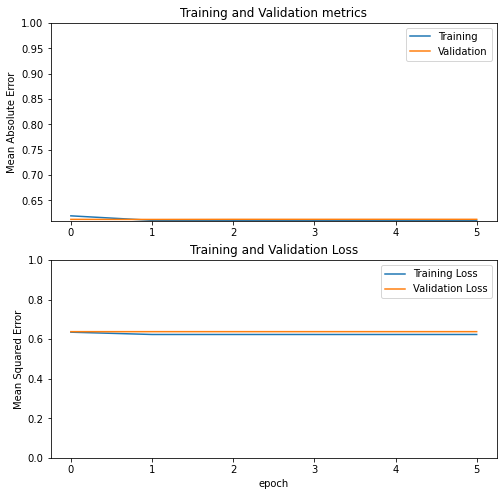

In [115]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation metrics')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Fine_Tuning

In [116]:
conv_model.trainable = True

In [117]:
len(conv_model.layers)

6

In [118]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 2

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  6


In [119]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])